# Covid-19 Data Analysis of Asian Countries

In this project we will import the datasets of Covid-19 infected rates and visualize the data to figure out which countries in the Asian Continent are more prone to getting affected. We will compare the Covid-19 affected data set with World Happiness Report of Asian countries provided by John Hopkins University to analyze the data.

## Code and Data Visualization

### Importing Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Modules Imported")

Modules Imported


## Importing Covid-19 Dataset of Asia (January2020-May2020)

In [49]:
corona_dataset_csv = pd.read_csv("Desktop/python/Covid 19 Data Analysis/Covid19DatasetSouthAsia.csv")
corona_dataset_csv.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
1,NaN,Bangladesh,23.6850,90.3563,0,0,0,0,0,0,...,5602,6190,6486,6901,7334,7579,7925,8425,9015,9375
2,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,0,...,122,122,122,122,122,122,122,122,122,123
3,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,985,985,985,985,985,985,985,985,985,985
4,Beijing,China,40.1824,116.4142,0,0,1,2,2,2,...,578,579,581,581,581,581,581,581,581,581


## Checking the Dataset Matrix

In [51]:
corona_dataset_csv.shape

(50, 134)

## Dropping Unnecessary Columns

In [52]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
1,NaN,Bangladesh,0,0,0,0,0,0,0,0,...,5602,6190,6486,6901,7334,7579,7925,8425,9015,9375
2,NaN,Cambodia,0,0,0,0,0,0,0,0,...,122,122,122,122,122,122,122,122,122,123
3,Anhui,China,0,0,0,0,0,0,0,2,...,985,985,985,985,985,985,985,985,985,985
4,Beijing,China,0,0,1,2,2,2,4,4,...,578,579,581,581,581,581,581,581,581,581


## Aggregarting Dataset by Country

In [53]:
corona_dataset_agg = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_agg.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
Bangladesh,0,0,0,0,0,0,0,0,0,0,...,5602,6190,6486,6901,7334,7579,7925,8425,9015,9375
Cambodia,0,0,0,0,0,0,0,0,0,0,...,122,122,122,122,122,122,122,122,122,123
China,28,30,36,39,49,58,101,120,135,214,...,79310,79332,79335,79343,79352,79358,79367,79371,79382,79386
India,0,0,0,0,0,0,0,0,0,0,...,48553,51824,54385,57692,60706,64277,67749,70920,82627,86936


In [54]:
corona_dataset_agg.shape

(18, 130)

## Plot of a few South Asian Countries 

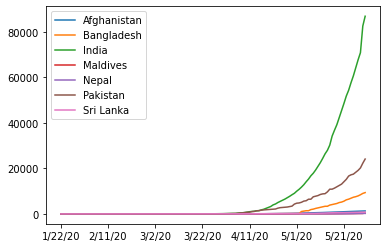

In [56]:
corona_dataset_agg.loc["Afghanistan"].plot()
corona_dataset_agg.loc["Bangladesh"].plot()
corona_dataset_agg.loc["India"].plot()
corona_dataset_agg.loc["Maldives"].plot()
corona_dataset_agg.loc["Nepal"].plot()
corona_dataset_agg.loc["Pakistan"].plot()
corona_dataset_agg.loc["Sri Lanka"].plot()
plt.legend()

### We can observe that India,Pakistan and Bangladesh has more cumulative increase of infected rates compared to other countries in the South Asian region

## Caclulating Maximum Infected Rate in Bangladesh in a day

In [40]:
corona_dataset_agg.loc["Bangladesh"].diff().max()

886.0

In [57]:
countries = list(corona_dataset_agg.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_agg.loc[c].diff().max())

corona_dataset_agg["max_infection_rate"] = max_infection_rates
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,996,1040,1075,1097,1128,1138,1209,1259,1303,80.0
Bangladesh,0,0,0,0,0,0,0,0,0,0,...,6190,6486,6901,7334,7579,7925,8425,9015,9375,886.0
Cambodia,0,0,0,0,0,0,0,0,0,0,...,122,122,122,122,122,122,122,122,123,15.0
China,28,30,36,39,49,58,101,120,135,214,...,79332,79335,79343,79352,79358,79367,79371,79382,79386,3995.0
India,0,0,0,0,0,0,0,0,0,0,...,51824,54385,57692,60706,64277,67749,70920,82627,86936,11707.0


## Dataset of Maximum Infection Rate of Asian Countries

In [59]:
corona_data = pd.DataFrame(corona_dataset_agg["max_infection_rate"])
corona_data.head(22)


,max_infection_rate
Country/Region,
Afghanistan,80.0
Bangladesh,886.0
Cambodia,15.0
China,3995.0
India,11707.0
Indonesia,523.0
Japan,2221.0
Laos,4.0
Malaysia,236.0


# Importing World Happiness Datasets

In [60]:
happiness_report_csv = pd.read_csv("Desktop/python/Covid 19 Data Analysis/WorldHealthReport2020Asia.csv")
happiness_report_csv.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
1,Bangladesh,South Asia,4.8328,0.040124,4.911443,4.754157,8.287064,0.687293,64.503067,0.900625,-0.033665,0.661844,1.972317,0.556156,0.868801,0.694941,0.604131,0.176745,0.176736,1.755262
2,Cambodia,Southeast Asia,4.8484,0.058007,4.962093,4.734707,8.249890,0.773081,61.529968,0.959705,0.051911,0.822769,1.972317,0.544635,1.071426,0.587904,0.674940,0.233342,0.072838,1.663300
3,China,East Asia,5.1239,0.025902,5.174667,5.073133,9.688568,0.798761,69.289192,0.898518,-0.181426,0.753971,1.972317,0.990533,1.132081,0.867249,0.601605,0.079021,0.117256,1.336182
4,Hong Kong S.A.R. of China,East Asia,5.5104,0.046019,5.600597,5.420203,10.934671,0.845969,76.771706,0.779834,0.134980,0.420607,1.972317,1.376746,1.243584,1.136631,0.459357,0.288281,0.332485,0.673293


## Aggregating Dataset by Country name

In [61]:
happiness_report = happiness_report_csv.groupby("Country name").sum()
happiness_report.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,
Afghanistan,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Bangladesh,4.8328,0.040124,4.911443,4.754157,8.287064,0.687293,64.503067,0.900625,-0.033665,0.661844,1.972317,0.556156,0.868801,0.694941,0.604131,0.176745,0.176736,1.755262
Cambodia,4.8484,0.058007,4.962093,4.734707,8.249890,0.773081,61.529968,0.959705,0.051911,0.822769,1.972317,0.544635,1.071426,0.587904,0.674940,0.233342,0.072838,1.663300
China,5.1239,0.025902,5.174667,5.073133,9.688568,0.798761,69.289192,0.898518,-0.181426,0.753971,1.972317,0.990533,1.132081,0.867249,0.601605,0.079021,0.117256,1.336182
Hong Kong S.A.R. of China,5.5104,0.046019,5.600597,5.420203,10.934671,0.845969,76.771706,0.779834,0.134980,0.420607,1.972317,1.376746,1.243584,1.136631,0.459357,0.288281,0.332485,0.673293


## Dropping unnecessary columns

In [62]:
happiness_report.drop(["Ladder score","Standard error of ladder score"],axis=1,inplace=True)


In [37]:
happiness_report.head()

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,
Afghanistan,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Albania,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
Algeria,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
Argentina,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
Armenia,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,-0.138780,0.773545,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162


## Joining two datasets 

In [41]:
data = corona_data.join(happiness_report,how="inner")
data.head()

,max_infection_rate,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Afghanistan,80.0,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Albania,31.0,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
Algeria,358.0,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
Argentina,468.0,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
Armenia,293.0,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,-0.138780,0.773545,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162


## Correlation of the joined Dataset

In [63]:
data.corr()

,max_infection_rate,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
max_infection_rate,1.000000e+00,2.256092e-01,2.352613e-01,3.064142e-01,1.808555e-01,2.862285e-01,1.438294e-01,-9.751410e-02,-1.022329e-01,1.514160e-16,3.064142e-01,1.808555e-01,2.862285e-01,1.438294e-01,-9.751410e-02,1.022329e-01,-3.532390e-03
upperwhisker,2.256092e-01,1.000000e+00,9.983486e-01,7.739729e-01,7.716818e-01,7.836877e-01,6.065201e-01,1.044109e-01,-4.364173e-01,2.297531e-16,7.739728e-01,7.716818e-01,7.836877e-01,6.065201e-01,1.044109e-01,4.364173e-01,4.968821e-01
lowerwhisker,2.352613e-01,9.983486e-01,1.000000e+00,7.885232e-01,7.815804e-01,7.987108e-01,6.075961e-01,9.395119e-02,-4.442948e-01,3.829923e-16,7.885232e-01,7.815804e-01,7.987108e-01,6.075961e-01,9.395119e-02,4.442948e-01,4.745118e-01
Logged GDP per capita,3.064142e-01,7.739729e-01,7.885232e-01,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.375368e-01,-3.386514e-01,1.859293e-15,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.375368e-01,3.386514e-01,-4.925589e-02
Social support,1.808555e-01,7.716818e-01,7.815804e-01,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-7.137585e-02,-2.245086e-01,-3.433339e-16,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-7.137585e-02,2.245086e-01,1.619174e-02
Healthy life expectancy,2.862285e-01,7.836877e-01,7.987108e-01,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-8.597477e-02,-3.614685e-01,9.775345e-16,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-8.597477e-02,3.614685e-01,-6.974693e-03
Freedom to make life choices,1.438294e-01,6.065201e-01,6.075961e-01,4.407609e-01,4.868377e-01,4.787323e-01,1.000000e+00,2.298333e-01,-4.289070e-01,5.036129e-16,4.407609e-01,4.868376e-01,4.787323e-01,1.000000e+00,2.298333e-01,4.289070e-01,7.963506e-02
Generosity,-9.751410e-02,1.044109e-01,9.395119e-02,-1.375368e-01,-7.137585e-02,-8.597477e-02,2.298333e-01,1.000000e+00,-2.777333e-01,-4.711302e-17,-1.375368e-01,-7.137584e-02,-8.597475e-02,2.298333e-01,1.000000e+00,2.777333e-01,8.220216e-02
Perceptions of corruption,-1.022329e-01,-4.364173e-01,-4.442948e-01,-3.386514e-01,-2.245086e-01,-3.614685e-01,-4.289070e-01,-2.777333e-01,1.000000e+00,-6.415621e-17,-3.386514e-01,-2.245085e-01,-3.614685e-01,-4.289070e-01,-2.777333e-01,-1.000000e+00,-2.037487e-02
Ladder score in Dystopia,1.514160e-16,2.297531e-16,3.829923e-16,1.859293e-15,-3.433339e-16,9.775345e-16,5.036129e-16,-4.711302e-17,-6.415621e-17,1.000000e+00,8.952089e-17,-7.941008e-16,3.102788e-16,6.865781e-16,-1.383720e-16,2.244388e-16,8.153068e-17


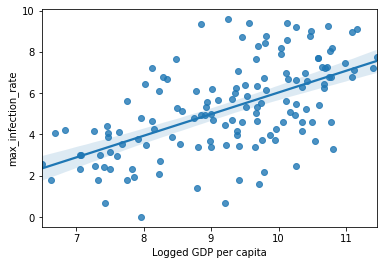

In [64]:
x = data["Logged GDP per capita"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y))

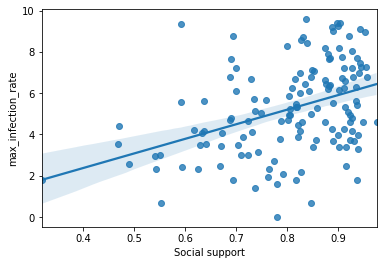

In [47]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y))

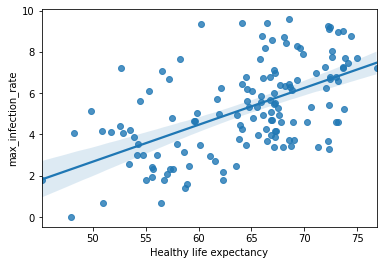

In [48]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.regplot(x,np.log(y))

# Observation:

## From the Data Visualization we can observe that,the countries which are more developed in Asia are more prone to getting infected